# Example: Groceries in Chicago

We will walk through an example that demonstrates how to clip geometries to the
boundary of a polygon geometry using GeoPandas.

This example shows how to clip a set of vector geometries to the spatial extent
/ shape of another object.

Both sets of geometries must be opened with `GeoPandas` as `GeoDataFrame`s and
be in the same **Coordinate Reference System** (`CRS`) for the `clip` function
from `GeoPandas` to work.

This example uses data from `geodatasets`, namely:

- `geoda.chicago-health`
- `geoda.groceries`

alongside a custom rectangle geometry made with shapely and then turned into a
`GeoDataFrame`.

::: {.callout-warning title="Warning" collapse="false"}

The object to be clipped will be clipped to the full extent of the clip object.  
If there are multiple polygons in clip object, the input data will be clipped
to the total boundary of all polygons in clip object.
:::

## Imports


In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box
import geodatasets

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib_inline
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings

import matplotlib.pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from ClimRR import set_plot_style, COLORS
set_plot_style()
from rich.console import Console as Console
from enrich.style import STYLES
from rich.theme import Theme

console = Console(theme=Theme(STYLES), log_path=False, markup=True)

The autoreload extension is already loaded. To reload it, use:


  %reload_ext autoreload


Using updated plot style for matplotlib

## Get or Create Example Data

Below, the example GeoPandas data is imported and opened as a `GeoDataFrame`.

Additionally, a polygon is created with shapely and then converted into a
`GeoDataFrame` with the same CRS as the `GeoPandas` dataset


In [3]:
import geodatasets
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries")).to_crs(chicago.crs)

Create a subset of the chicago data that is just the near west side


In [4]:
near_west_side = chicago[chicago["community"] == "NEAR WEST SIDE"]
lincoln_park = chicago[chicago["community"] == "LINCOLN PARK"]
logan_square = chicago[chicago["community"] == "LOGAN SQUARE"]

Create a custom polygon


In [5]:
polygon = box(-87.8, 41.9, -87.5, 42)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=chicago.crs)

## Plot the Unclipped Data


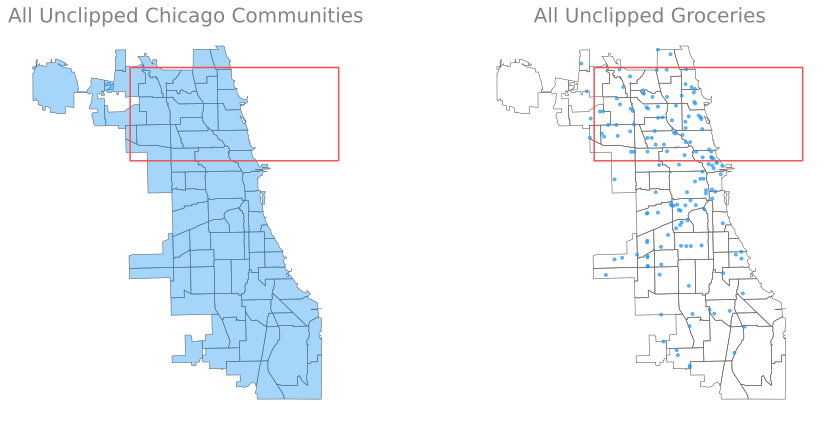

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), ncols=2, sharey='col')
poly_gdf.boundary.plot(ax=ax1, color=COLORS['red'])
chicago.boundary.plot(ax=ax1, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
# near_west_side.boundary.plot(ax=ax2, color=COLORS['red'])
# near_west_side.plot(ax=ax2, color=COLORS['green'], alpha=0.3)
# west_town.plot(ax=ax2, color=COLORS['green'], alpha=0.3)
chicago.plot(ax=ax1, alpha=0.4)
poly_gdf.boundary.plot(ax=ax2, color=COLORS['red'])
chicago.boundary.plot(ax=ax2, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
groceries.plot(ax=ax2, color=COLORS['blue'], zorder=1, marker='.', alpha=0.66)
ax1.set_title("All Unclipped Chicago Communities", fontsize=20)
ax2.set_title("All Unclipped Groceries", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.tight_layout()

## Clip the Data

The object on which you call `clip` is the object that will be clipped.

The object you pass is the clip extent.

The returned output will be a new clipped `GeoDataFrame`. All of the attributes
for each returned geometry will be retained when you clip.

::: {.callout-tip title="Coordinate Reference System" collapse="false"}

Recall that the data must be in the same CRS in order to use the `clip` method.

If the data is not in the same CRS, be sure to use the `GeoDataFrame.to_crs`
method to ensure both datasets are in the same CRS.
:::

## Clip the Chicago Data


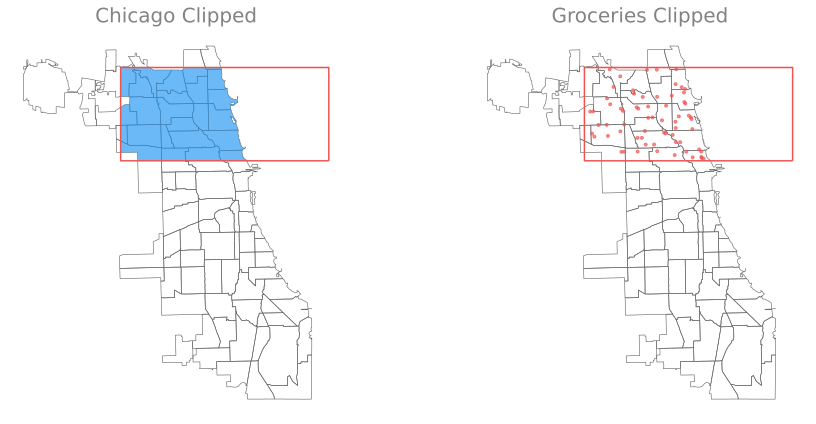

In [7]:
chicago_clipped = chicago.clip(polygon)
groceries_clipped = groceries.clip(polygon)
# plot the clipped data
fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
ax0 = chicago_clipped.plot(ax=ax[0], color='C0', alpha=0.66)
ax0 = chicago.boundary.plot(ax=ax[0], color=COLORS['grey060'], zorder=-1, linewidth=0.6)
ax0 = poly_gdf.boundary.plot(ax=ax[0], color=COLORS['red'])

ax1 = groceries_clipped.plot(ax=ax[1], color='C1', alpha=0.66, zorder=10, marker='.')
# chicago.boundary.plot(ax=ax[1], color='#444444')
ax1 = chicago.boundary.plot(ax=ax[1], color=COLORS['grey060'], zorder=-1, linewidth=0.6)
ax1 = poly_gdf.boundary.plot(ax=ax[1], color=COLORS['red'])

ax0.set_title("Chicago Clipped", fontsize=20)
ax0.set_axis_off()
ax1.set_title("Groceries Clipped", fontsize=20)
ax1.set_axis_off()
plt.tight_layout()

## Clip the Groceries Data

Next we'll look at the distribution of grocery stores in two different communities.


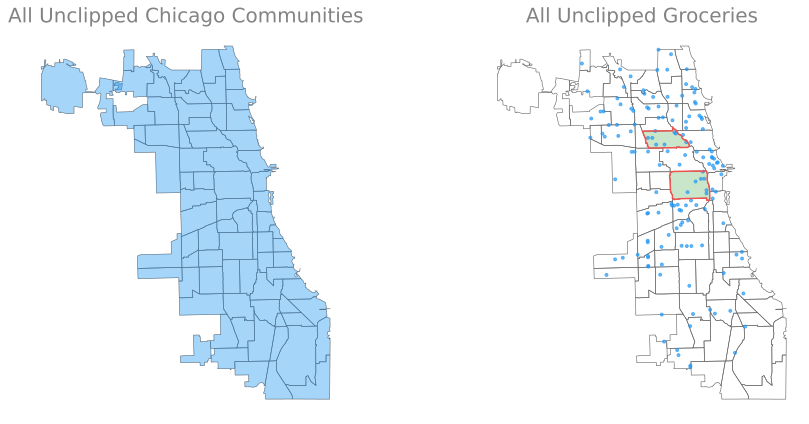

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), ncols=2, sharey='col')
chicago.boundary.plot(ax=ax1, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
near_west_side.boundary.plot(ax=ax2, color=COLORS['red'])
near_west_side.plot(ax=ax2, color=COLORS['green'], alpha=0.3)

logan_square.boundary.plot(ax=ax2, color=COLORS['red'])
logan_square.plot(ax=ax2, color=COLORS['green'], alpha=0.3)
# west_town.plot(ax=ax2, color=COLORS['green'], alpha=0.3)
chicago.plot(ax=ax1, alpha=0.4)
chicago.boundary.plot(ax=ax2, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
groceries.plot(ax=ax2, color=COLORS['blue'], zorder=1, marker='.', alpha=0.66)
ax1.set_title("All Unclipped Chicago Communities", fontsize=20)
ax2.set_title("All Unclipped Groceries", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.tight_layout()

## Groceries in Near West Side


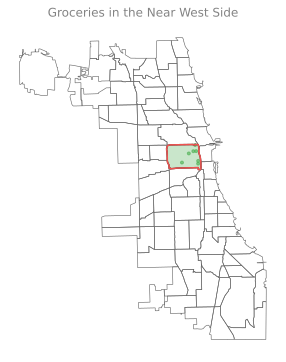

In [9]:
groceries_west_side = groceries.clip(near_west_side)
fig, ax = plt.subplots(figsize=(14,6))
groceries_west_side.plot(ax=ax, color='C2', marker='.', alpha=0.6)
chicago.boundary.plot(ax=ax, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
near_west_side.boundary.plot(ax=ax, color='#444444')
near_west_side.boundary.plot(ax=ax, color=COLORS['red'])
near_west_side.plot(ax=ax, color=COLORS['green'], alpha=0.3)
ax.set_title("Groceries in the Near West Side")
ax.set_axis_off()

## Groceries in Logan Square


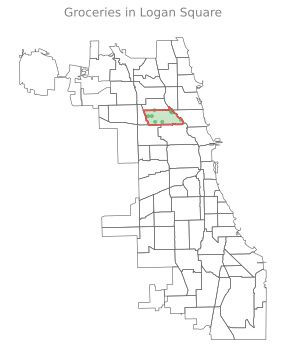

In [10]:
groceries_logan_square = groceries.clip(logan_square)
fig, ax = plt.subplots(figsize=(14,6))
groceries_logan_square.plot(ax=ax, color='C2', marker='.', alpha=0.6)
chicago.boundary.plot(ax=ax, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
logan_square.boundary.plot(ax=ax, color='#444444')
logan_square.boundary.plot(ax=ax, color=COLORS['red'])
logan_square.plot(ax=ax, color=COLORS['green'], alpha=0.3)
ax.set_title("Groceries in Logan Square")
ax.set_axis_off()

## Groceries in Lincoln Park


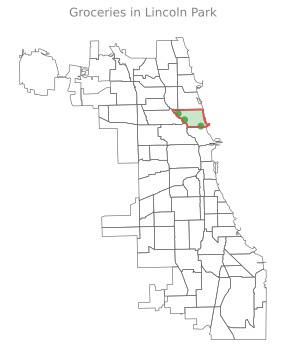

In [11]:
groceries_lp = groceries.clip(lincoln_park)
fig, ax = plt.subplots(figsize=(14,6))
groceries_lp.plot(ax=ax, color='C2')
chicago.boundary.plot(ax=ax, color=COLORS['grey060'], linewidth=0.6, zorder=-1)
lincoln_park.boundary.plot(ax=ax, color='#444444')
lincoln_park.boundary.plot(ax=ax, color=COLORS['red'])
lincoln_park.plot(ax=ax, color=COLORS['green'], alpha=0.3)
ax.set_title("Groceries in Lincoln Park")
ax.set_axis_off()

## Additional Questions

- Can you identify which neighborhoods have the most grocery stores? How many?
    - Which have the least? How many?

## Reference

[GeoPandas: Clip Vector Data](https://geopandas.org/en/stable/gallery/plot_clip.html)